<a href="https://colab.research.google.com/github/DB9653/Projektarbeit/blob/main/FINAL_NSIT_IIITDWD_GERMEVAL2019_subtaskA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/roushan-raj/HASOC-2020/blob/master/Models/German%20Models/German%20Sub-task%20A.ipynb


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'


# Dataset Reading


In [ ]:
import csv
import pandas as pd 
#data = pd.read_excel('/content/hasoc_2020_de_train_new_a.xlsx', converters={'tweet_id':int})
data = pd.read_csv("/content/germeval2019.training_subtask1_2_korrigiert.txt",sep="\t", encoding = "UTF-8", quoting=csv.QUOTE_NONE, names=("text", "task1", "task2"))
pd.set_option('display.max_colwidth',150)
data.head(10)

,text,task1,task2
0,@jouwatch Hat die Polizei keine Kanone mehr ? 20 mal in die Munition laufen lassen und Ruhe ist .,OFFENSE,ABUSE
1,@de_sputnik @Saudi Arabien habt ihr mal wieder einen Orgasmus gebaucht oder weswegen habt ihr die Frau gekillt ? Erzählt mit aber nicht so einen v...,OFFENSE,ABUSE
2,"Glaube ich nicht , die Bundesregierung so wie die Justiz ist so was von Korrupt und arbeiten so fleißig zusammen , das dies nicht erscheinen wird .",OFFENSE,ABUSE
3,""" Doch schockierend viele Jugendliche wissen kaum mehr etwas über den Holocaust. "" Das ist nicht schockierend das ist gut so . Wie sollen junge Me...",OFFENSE,PROFANITY
4,Sein Charakter war ihm wichtiger anstatt als billige Nute für Korrupte Regierungen zu arbeiten .Er hat das Leben begriffen,OFFENSE,PROFANITY
5,"@de_sputnik @JPN_PMO "" Obwohl das US-Militär gemäß dem Sicherheitsvertrag zwischen den USA und Japan das Recht hat Land und Kapazitäten auf dem Te...",OFFENSE,ABUSE
6,"Warum schalten sich die verdammten Schmierenkomödianten nicht dann ein wenn das schiff 40 km vor der Libyschen Küste ist anstatt sie weit auf,s Me...",OFFENSE,PROFANITY
7,"Ob Jesus für das oder jenes Starb ist doch wohl Scheißegal , wir leben im hier und jetzt und sollten versuchen ein vernümftiges Leben auf zu bauen...",OFFENSE,PROFANITY
8,"@de_sputnik Ob Jesus für das oder jenes Starb ist doch wohl Scheißegal , wir leben im hier und jetzt und sollten versuchen ein vernümftiges Leben ...",OFFENSE,PROFANITY
9,"Das ist allerdings wahr , jeder Amerikaner weiß das der Tot Amerika aufgebaut hat und immer weiter versucht auf diese Basis auszubauen.",OFFENSE,ABUSE


In [ ]:
data.shape

(3995, 3)

In [ ]:
print(data.dtypes)

text     object
task1    object
task2    object
dtype: object


# Making of "label" Variable


In [ ]:
label = data['task1']
label.head()

0    OFFENSE
1    OFFENSE
2    OFFENSE
3    OFFENSE
4    OFFENSE
Name: task1, dtype: object

# Checking Dataset Balancing


OTHER      2708
OFFENSE    1287
Name: task1, dtype: int64


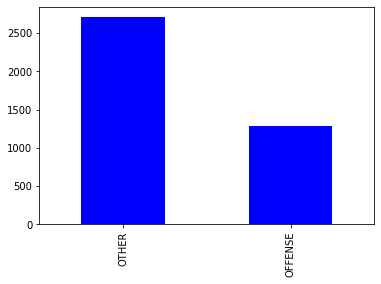

In [ ]:
print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

# Converting label into "0" or "1"


In [ ]:
import numpy as np
classes_list = ["OFFENSE","OTHER"]
label_index = data['task1'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:10])



[0 0 0 0 0 0 0 0 0 0]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=2)

In [ ]:
print(label_twoDimension[:10])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Making of "text" Variable


In [ ]:
text = data['text']
text.head(10)



0                                                        @jouwatch Hat die Polizei keine Kanone mehr ? 20 mal in die Munition laufen lassen und Ruhe ist .
1    @de_sputnik @Saudi Arabien habt ihr mal wieder einen Orgasmus gebaucht oder weswegen habt ihr die Frau gekillt ? Erzählt mit aber nicht so einen v...
2      Glaube ich nicht , die Bundesregierung so wie die Justiz ist so was von Korrupt und arbeiten so fleißig zusammen , das dies nicht erscheinen wird .
3    " Doch schockierend viele Jugendliche wissen kaum mehr etwas über den Holocaust. " Das ist nicht schockierend das ist gut so . Wie sollen junge Me...
4                               Sein Charakter war ihm wichtiger anstatt als billige Nute für Korrupte Regierungen zu arbeiten .Er hat das Leben begriffen
5    @de_sputnik @JPN_PMO " Obwohl das US-Militär gemäß dem Sicherheitsvertrag zwischen den USA und Japan das Recht hat Land und Kapazitäten auf dem Te...
6    Warum schalten sich die verdammten Schmierenkomödianten nicht dan

# Dataset Pre-processing


In [ ]:
def remove_umlaut(string):
    """
    Removes umlauts from strings and replaces them with the letter+e convention
    :param string: string to remove umlauts from
    :return: unumlauted string
    """
    u = 'ü'.encode()
    U = 'Ü'.encode()
    a = 'ä'.encode()
    A = 'Ä'.encode()
    o = 'ö'.encode()
    O = 'Ö'.encode()
    ss = 'ß'.encode()

    string = string.encode()
    string = string.replace(u, b'ue')
    string = string.replace(U, b'Ue')
    string = string.replace(a, b'ae')
    string = string.replace(A, b'Ae')
    string = string.replace(o, b'oe')
    string = string.replace(O, b'Oe')
    string = string.replace(ss, b'ss')

    string = string.decode('utf-8')
    return string

In [ ]:
text_wo_umlauts = text.apply(lambda x:remove_umlaut(x))
text_wo_umlauts.head(10)

0                                                        @jouwatch Hat die Polizei keine Kanone mehr ? 20 mal in die Munition laufen lassen und Ruhe ist .
1    @de_sputnik @Saudi Arabien habt ihr mal wieder einen Orgasmus gebaucht oder weswegen habt ihr die Frau gekillt ? Erzaehlt mit aber nicht so einen ...
2     Glaube ich nicht , die Bundesregierung so wie die Justiz ist so was von Korrupt und arbeiten so fleissig zusammen , das dies nicht erscheinen wird .
3    " Doch schockierend viele Jugendliche wissen kaum mehr etwas ueber den Holocaust. " Das ist nicht schockierend das ist gut so . Wie sollen junge M...
4                              Sein Charakter war ihm wichtiger anstatt als billige Nute fuer Korrupte Regierungen zu arbeiten .Er hat das Leben begriffen
5    @de_sputnik @JPN_PMO " Obwohl das US-Militaer gemaess dem Sicherheitsvertrag zwischen den USA und Japan das Recht hat Land und Kapazitaeten auf de...
6    Warum schalten sich die verdammten Schmierenkomoedianten nicht da

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text = text_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0                                                         jouwatch hat die polizei keine kanone mehr   20 mal in die munition laufen lassen und ruhe ist .
1     de sputnik  saudi arabien habt ihr mal wieder einen orgasmus gebaucht oder weswegen habt ihr die frau gekillt   erzaehlt mit aber nicht so einen ...
2     glaube ich nicht , die bundesregierung so wie die justiz ist so was von korrupt und arbeiten so fleissig zusammen , das dies nicht erscheinen wird .
3      doch schockierend viele jugendliche wissen kaum mehr etwas ueber den holocaust.   das ist nicht schockierend das ist gut so . wie sollen junge m...
4                              sein charakter war ihm wichtiger anstatt als billige nute fuer korrupte regierungen zu arbeiten .er hat das leben begriffen
5     de sputnik  jpn pmo   obwohl das us-militaer gemaess dem sicherheitsve rag zwischen den usa und japan das recht hat land und kapazitaeten auf dem...
6    warum schalten sich die verdammten schmierenkomoedianten nicht da

# Removing stopwords


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0                                                                                      jouwatch polizei kanone mehr   20 mal munition laufen lassen ruhe .
1     de sputnik  saudi arabien habt mal orgasmus gebaucht weswegen habt frau gekillt   erzaehlt verlogenen scheissdreck bezogen   gemordet luegen seit...
2                                                                        glaube , bundesregierung justiz korrupt arbeiten fleissig zusammen , erscheinen .
3      schockierend viele jugendliche wissen kaum mehr ueber holocaust.   schockierend gut . sollen junge menschen freundschaften juden entwickeln ,wen...
4                                                          charakter wichtiger anstatt billige nute fuer korrupte regierungen arbeiten .er leben begriffen
5     de sputnik  jpn pmo   obwohl us-militaer gemaess sicherheitsve rag usa japan recht land kapazitaeten territorium japans nutzen,   munde zergehen ...
6                                        warum schalten verdammten sch

# Lemmatization

# Stemming

In [ ]:


# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text



In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head())

0                                                                                      jouwatch polizei kanone mehr   20 mal munition laufen lassen ruhe .
1     de sputnik  saudi arabien habt mal orgasmus gebaucht weswegen habt frau gekillt   erzaehlt verlogenen scheissdreck bezogen   gemordet luegen seit...
2                                                                        glaube , bundesregierung justiz korrupt arbeiten fleissig zusammen , erscheinen .
3      schockierend viele jugendliche wissen kaum mehr ueber holocaust.   schockierend gut . sollen junge menschen freundschaften juden entwickeln ,wen...
4                                                          charakter wichtiger anstatt billige nute fuer korrupte regierungen arbeiten .er leben begriffen
Name: text, dtype: object


# Tokenization using "keras"


In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)

# Making Vocab for words


In [ ]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

16773


In [ ]:


l = tok_all.word_index
print(l)



{'u': 1, 'lbr': 2, 'fuer': 3, 'ja': 4, 'mal': 5, 'schon': 6, 'mehr': 7, 'heute': 8, 'immer': 9, '0001f602': 10, 'uhr': 11, 'gibt': 12, 'afd': 13, 'menschen': 14, 'geht': 15, 'nicht': 16, 'ueber': 17, 'aachen': 18, 'en': 19, 'ist': 20, 'e': 21, 'deutschland': 22, 'ab': 23, 'spd': 24, 'gut': 25, 'wer': 26, '0001f44b': 27, 'a': 28, 'amp': 29, 'fe0f': 30, 'einfach': 31, 'koennen': 32, 'warum': 33, 'kommt': 34, 'ganz': 35, 'macht': 36, 'pa': 37, 'blockupy': 38, 'stegner': 39, 's': 40, '200d': 41, 'hat': 42, 'seit': 43, 'az': 44, 'merkel': 45, '00': 46, 'sein': 47, '2': 48, 'genau': 49, '1': 50, '30': 51, 'danke': 52, 'wuerde': 53, 'eigentlich': 54, '18': 55, 'lassen': 56, 'deutsche': 57, 'werden': 58, '20': 59, 'muessen': 60, 'hast': 61, 'ralf': 62, 'do': 63, 'eu': 64, 'endlich': 65, 'waere': 66, 'bitte': 67, 'nazis': 68, 'haben': 69, 'frankfu': 70, 'morgen': 71, 'wirklich': 72, 'welt': 73, 'demo': 74, 'cdu': 75, 'wurde': 76, 'sind': 77, 'dafuer': 78, 'bild': 79, 'tag': 80, 'gar': 81, 'frau

# encoding or sequencing


In [ ]:
encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[0])
print(encoded_clean_text_stem[0])

 jouwatch polizei kanone mehr   20 mal munition laufen lassen ruhe .
[174, 130, 6387, 7, 59, 5, 3922, 603, 56, 846]


# Pre-padding


In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')

# Reading Test data and Pre-processing


In [ ]:
data_t = pd.read_csv("/content/germeval2019GoldLabelsSubtask1_2.txt", sep="\t", encoding = "UTF-8", names=("text", "task1", "task2"))
pd.set_option('display.max_colwidth',150)
data_t.head(10)



,text,task1,task2
0,@JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...,OFFENSE,INSULT
1,"@faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schäuble, vdLeyen für Korruption, Schwarzgeld, und dies überall...",OFFENSE,ABUSE
2,"@DLFNachrichten Die Gesichter, Namen, Religion der Täter würde zur Aufklärung beitragen...",OTHER,OTHER
3,"@welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man da...",OFFENSE,ABUSE
4,"@hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst für ihr kacken arbeiten...",OFFENSE,ABUSE
5,"@aktuelle_stunde Also beim Fall Birmingham, England war definitiv weniger Empörung, weniger Berichterstattung, wenn man ehrlich mit sich ist gab e...",OTHER,OTHER
6,"@StZ_NEWS Aber bei läppischen 130.000 Euro der AfD den Welt, Demokratieuntergang herbei schreiben....wie süß",OTHER,OTHER
7,@StZ_NEWS Schäuble wird wissen woher dieses Nazi Geld kommt....FJS hatte doch auch glasige Augen vor Freude wenn vom Führer die Rede war..,OFFENSE,ABUSE
8,"@welt Komisch, wäre dieser Betrug in der Nähe der AfD passiert wäre eine andere Empörung erkennbar, so aber da es Ferkel und Co trifft werden Baue...",OFFENSE,ABUSE
9,"@investigativ_de @welt @Tim_Roehn @ChSchweppe Und alle Wege führen zu von der Leyen, was dann verwundert das die immer noch im Amt ist, wobei, im ...",OFFENSE,ABUSE


In [ ]:
data_t.shape

(3031, 3)

In [ ]:
print(data_t.dtypes)

text     object
task1    object
task2    object
dtype: object


In [ ]:


label_t = data_t['task1']
label_t.head()



0    OFFENSE
1    OFFENSE
2      OTHER
3    OFFENSE
4    OFFENSE
Name: task1, dtype: object

OTHER      2061
OFFENSE     970
Name: task1, dtype: int64


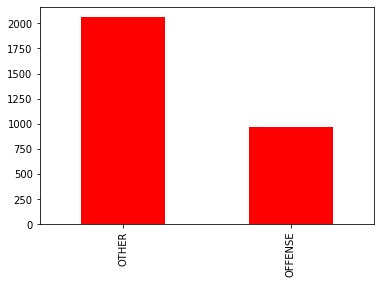

In [ ]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

In [ ]:


import numpy as np
classes_list_t = ["OFFENSE","OTHER"]
label_t_index = data_t['task1'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])



[0 0 1 0 0 1 1 0 0 0]


In [ ]:


from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=2)



In [ ]:
print(label_twoDimension_t[:10])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:


text_t = data_t['text']
text_t.head(10)



0                                      @JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...
1                  @faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schäuble, vdLeyen für Korruption, Schwarzgeld, und dies überall...
2                                                               @DLFNachrichten Die Gesichter, Namen, Religion der Täter würde zur Aufklärung beitragen...
3    @welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man da...
4    @hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst für ihr kacken arbeiten...
5    @aktuelle_stunde Also beim Fall Birmingham, England war definitiv weniger Empörung, weniger Berichterstattung, wenn man ehrlich mit sich ist gab e...
6                                             @StZ_NEWS Aber bei läppi

In [ ]:
test_wo_umlauts = text_t.apply(lambda x: remove_umlaut(x))

In [ ]:
test_wo_umlauts.head()

0                                    @JanZimmHHB @mopo Komisch das die Realitaetsverweigerung immer von linken erbaermlichen Correctiv Accounts ausgeht...
1               @faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schaeuble, vdLeyen fuer Korruption, Schwarzgeld, und dies ueberall...
2                                                            @DLFNachrichten Die Gesichter, Namen, Religion der Taeter wuerde zur Aufklaerung beitragen...
3    @welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man da...
4    @hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst fuer ihr kacken arbeite...
Name: text, dtype: object

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text_t = test_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0                                     janzimmhhb  mopo komisch das die realitaetsverweigerung immer von linken erbaermlichen correctiv accounts ausgeht...
1                faznet  gruene europa  spdeuropa  cdu cdu steht seid strauss, kohl, schaeuble, vdleyen fuer korruption, schwarzgeld, und dies ueberall...
2                                                             dlfnachrichten die gesichter, namen, religion der taeter wuerde zur aufklaerung beitragen...
3     welt wie verwir  muss man sein um sich zu weigern die tatsachen anzuerkennen, das dieser hass von ferkel impo ie  wurde....was bezweckt man damit...
4     hacker 1991  torben braga weil die afd den ferkelfunk abschaffen will, deshalb haben die linken zecken, schmarotzer angst fuer ihr kacken arbeite...
5     aktuelle stunde also beim fall birmingham, england war definitiv weniger empoerung, weniger berichterstattung, wenn man ehrlich mit sich ist gab ...
6                                           stz news aber bei laeppisc

In [ ]:


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0                                                 janzimmhhb  mopo komisch realitaetsverweigerung immer linken erbaermlichen correctiv accounts ausgeht...
1                         faznet  gruene europa  spdeuropa  cdu cdu steht seid strauss, kohl, schaeuble, vdleyen fuer korruption, schwarzgeld, ueberall...
2                                                                         dlfnachrichten gesichter, namen, religion taeter wuerde aufklaerung beitragen...
3                                 welt verwir  weigern tatsachen anzuerkennen, hass ferkel impo ie  wurde....was bezweckt selber beluegen, unverstaendlich
4     hacker 1991  torben braga afd ferkelfunk abschaffen will, deshalb linken zecken, schmarotzer angst fuer kacken arbeiten muessen, deshalb fuehrer ...
5     aktuelle stunde beim fall birmingham, england definitiv weniger empoerung, weniger berichterstattung, ehrlich gab gar oerr, hintergrundwissen, re...
6                                                            stz news 

# Stemming

In [ ]:
# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0                                                 janzimmhhb  mopo komisch realitaetsverweigerung immer linken erbaermlichen correctiv accounts ausgeht...
1                         faznet  gruene europa  spdeuropa  cdu cdu steht seid strauss, kohl, schaeuble, vdleyen fuer korruption, schwarzgeld, ueberall...
2                                                                         dlfnachrichten gesichter, namen, religion taeter wuerde aufklaerung beitragen...
3                                 welt verwir  weigern tatsachen anzuerkennen, hass ferkel impo ie  wurde....was bezweckt selber beluegen, unverstaendlich
4     hacker 1991  torben braga afd ferkelfunk abschaffen will, deshalb linken zecken, schmarotzer angst fuer kacken arbeiten muessen, deshalb fuehrer ...
5     aktuelle stunde beim fall birmingham, england definitiv weniger empoerung, weniger berichterstattung, ehrlich gab gar oerr, hintergrundwissen, re...
6                                                            stz news 

In [ ]:


import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)



In [ ]:


vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)



14335


In [ ]:
test_list = tok_test.word_index
print(test_list)

{'u': 1, 'lbr': 2, 'fuer': 3, 'ja': 4, 'mehr': 5, 'spd': 6, 'mal': 7, 'e': 8, 'schon': 9, 'immer': 10, 'ist': 11, 'fcsp': 12, 'de': 13, 'ueber': 14, 'gibt': 15, 'ha': 16, 'heute': 17, 'watch': 18, 'mena': 19, 'jungnaiv': 20, 'tilojung': 21, 'sdgmasterglass': 22, 'ilona': 23, 'gr': 24, 'czsystuvx': 25, 'netzengel': 26, 'palactnet': 27, 'cdu': 28, 'deutschland': 29, 'vonbeutelratte': 30, 'wer': 31, 'nicht': 32, 'z': 33, 'einfach': 34, '0001f3fb': 35, 'menschen': 36, 'koennen': 37, 'geht': 38, 'iv': 39, 's': 40, '0001f923': 41, 'warum': 42, 'en': 43, 'ba': 44, '0001f602': 45, 'wuerde': 46, 'albe': 47, 'enst1': 48, '2': 49, 'bschuller': 50, 'berlinpapers': 51, 'merkel': 52, 'a': 53, 'waere': 54, '0001f914': 55, 'welt': 56, 'kommt': 57, '0001f44d': 58, 'macht': 59, 'afd': 60, 'gut': 61, 've': 62, 'werden': 63, 'wird': 64, 'toll': 65, 'leben': 66, 'muessen': 67, 'ganz': 68, 'gruenen': 69, 'hat': 70, 'pa': 71, 'genau': 72, 'sein': 73, 'deutsche': 74, '0001f621': 75, 'haben': 76, 'deutschen': 

In [ ]:


encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])



 janzimmhhb  mopo komisch realitaetsverweigerung immer linken erbaermlichen correctiv accounts ausgeht...
[1437, 9, 156, 1374, 2829]


In [ ]:


from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')



# FastText Embeddings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gunzip /content/drive/MyDrive/cc.de.300.vec.gz

In [ ]:
# https://stackoverflow.com/questions/69964788/how-to-unzip-gz-file-using-google-colab

# FastText Embedding link - https://fasttext.cc/docs/en/crawl-vectors.html

import os
embeddings_index = {}
f = open('/content/drive/MyDrive/cc.de.300.vec',encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 2000000 word vectors.


In [ ]:


embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector



# CNN 1 Model


In [ ]:


from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq



In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length)

In [ ]:
CNN1_network=Sequential([Embedding_Layer,
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(2,activation="sigmoid")
                       ])



In [ ]:
CNN1_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          5032200   
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          115328    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                        

In [ ]:
# https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers
from tensorflow.keras.optimizers import Adam
CNN1_network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN1_network, to_file='CNN2_model_GERMEVAL2019_TASK_A.png', show_shapes=True, show_layer_names=True)

from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



In [ ]:


from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



# Model Fitting or Training


In [ ]:
hist = CNN1_network.fit(padded_clean_text_stem,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
125/125 [==============================] - 13s 13ms/step - loss: 0.6548 - accuracy: 0.6538 - lr: 3.0000e-05
Epoch 2/200
125/125 [==============================] - 1s 12ms/step - loss: 0.6252 - accuracy: 0.6778 - lr: 3.0000e-05
Epoch 3/200
125/125 [==============================] - 2s 12ms/step - loss: 0.6195 - accuracy: 0.6778 - lr: 3.0000e-05
Epoch 4/200
125/125 [==============================] - 1s 12ms/step - loss: 0.6146 - accuracy: 0.6778 - lr: 3.0000e-05
Epoch 5/200
125/125 [==============================] - 1s 12ms/step - loss: 0.6104 - accuracy: 0.6778 - lr: 3.0000e-05
Epoch 6/200
125/125 [==============================] - 1s 12ms/step - loss: 0.5993 - accuracy: 0.6778 - lr: 3.0000e-05
Epoch 7/200
125/125 [==============================] - 1s 12ms/step - loss: 0.5919 - accuracy: 0.6791 - lr: 3.0000e-05
Epoch 8/200
125/125 [==============================] - 2s 16ms/step - loss: 0.5774 - accuracy: 0.6836 - lr: 3.0000e-05
Epoch 9/200
125/125 [==========================

# log loss

In [ ]:
CNN1_network_predictions = CNN1_network.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN1_network_predictions)
log_loss_test

2.714264760420391

# Classification Report


In [ ]:
predictions = np.zeros_like(CNN1_network_predictions)
predictions[np.arange(len(CNN1_network_predictions)), CNN1_network_predictions.argmax(1)] = 1



In [ ]:


predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger



array([1, 1, 1, ..., 1, 1, 1])

In [ ]:


pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task1"])
print(df)



      task1
0         1
1         1
2         1
3         1
4         0
...     ...
3026      1
3027      1
3028      1
3029      1
3030      1

[3031 rows x 1 columns]


In [ ]:
df.to_csv("NSIT_submission_GERMEVAL2019_TASK_A_DE_A.csv", index=False)

In [ ]:


from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))



              precision    recall  f1-score   support

           0       0.55      0.35      0.43       970
           1       0.74      0.87      0.80      2061

   micro avg       0.70      0.70      0.70      3031
   macro avg       0.65      0.61      0.61      3031
weighted avg       0.68      0.70      0.68      3031
 samples avg       0.70      0.70      0.70      3031



# Epoch v/s Loss Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

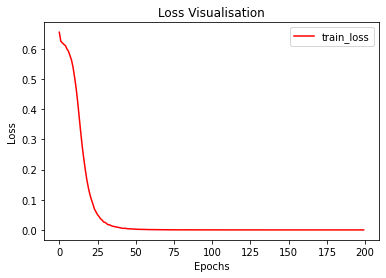

In [ ]:


from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN1_GERMEVAL2019_TASK_A_Ger_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN1_GERMEVAL2019_TASK_A_Ger_lossPlot.pdf') 



# Epoch v/s Accuracy Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

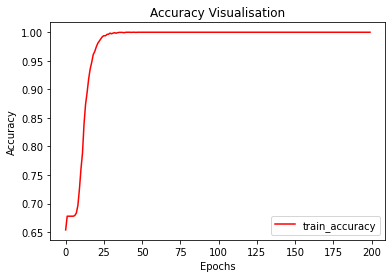

In [ ]:


plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN1_GERMEVAL2019_TASK_A_Ger_accuracyPlot.pdf',dpi=1000)
files.download('CNN1_GERMEVAL2019_TASK_A_Ger_accuracyPlot.pdf') 



# Area under Curve-ROC


In [ ]:


pred_train = CNN1_network.predict(padded_clean_text_stem)
pred_test = CNN1_network.predict(padded_clean_text_t_stem)



In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN1_GERMEVAL2019_TASK_A_Ger_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN1_GERMEVAL2019_TASK_A_Ger_Area_RocPlot.pdf')

  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

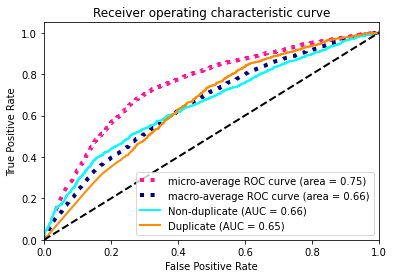

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)